In [1]:
from medpy.io import load
import os
import nibabel as nib
from glob import glob
import re
DATA_PATH = '../../archive_BraTS2022'
TRAIN_PATH = f'{DATA_PATH}/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData'
TEST_PATH = f'{DATA_PATH}/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData'
DATA_TYPES = ['flair', 't1', 't1ce', 't2', 'seg']
N_FOLDS = 5

def load_brats_data(path):
    files_path = []
    mask_paths = []
    unique_id = []
    for file_path in glob(f'{path}/*/*.nii'):
        if re.search(r"_t1(?=\.)", file_path):
            files_path.append(file_path)
        if "seg" in file_path:  # segmentation mask file
            mask_paths.append(file_path)
        unique_id.append(str(int(file_path.split('_')[-2])))
        
    return sorted(files_path), sorted(mask_paths), sorted(list(set(unique_id)), key=lambda x: int(x))


brats_file_paths, brats_mask_paths, brats_unique_id = load_brats_data(TRAIN_PATH)

In [2]:
print(brats_file_paths[:2], len(brats_file_paths))
print(brats_mask_paths[:2], len(brats_mask_paths))
print(brats_unique_id[:5], len(brats_unique_id))

['../../archive_BraTS2022/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1.nii', '../../archive_BraTS2022/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_002/BraTS20_Training_002_t1.nii'] 369
['../../archive_BraTS2022/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_seg.nii', '../../archive_BraTS2022/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_002/BraTS20_Training_002_seg.nii'] 369
['1', '2', '3', '4', '5'] 369


In [3]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
def plot_mask_with_rectangles(mask_image, rectangles, title="Mask with Rectangles"):
    """
    mask_image: 2D NumPy 배열, 마스크 이미지
    rectangles: 사각형 정보가 담긴 리스트, 각 항목은 (x, y, w, h)
    title: 그래프 제목
    """
    # 이미지 복사본 생성
    img_display = cv2.cvtColor(mask_image.astype(np.uint8), cv2.COLOR_GRAY2RGB)

    # 사각형을 이미지에 그리기
    for rect in rectangles:
        x, y, w, h = rect
        cv2.rectangle(img_display, (x, y), (x + w, y + h), (0, 255, 0), 1)  # 녹색 사각형

    # 이미지 표시
    plt.figure(figsize=(3, 3))
    plt.imshow(img_display, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# t1 visualization

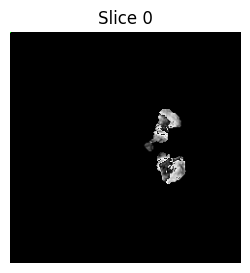

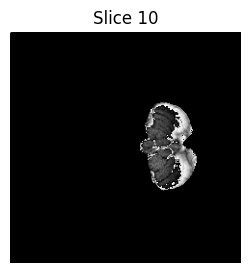

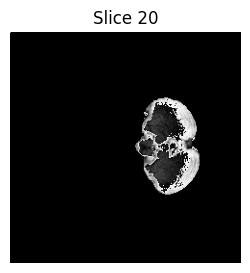

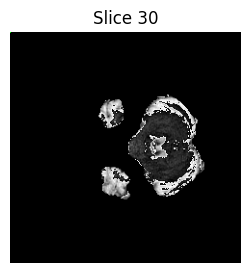

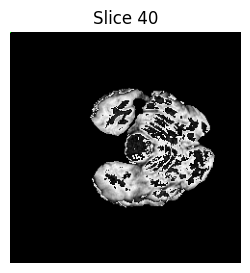

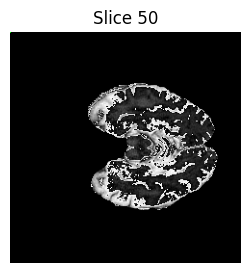

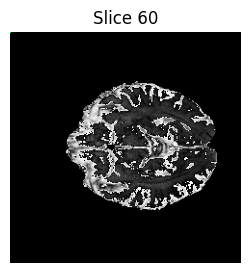

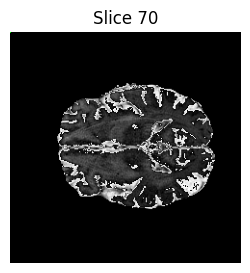

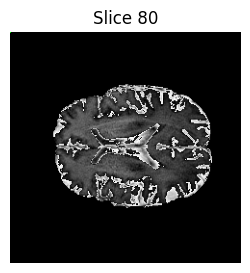

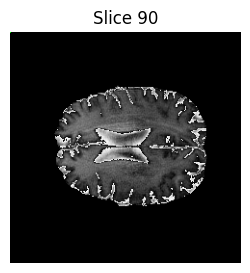

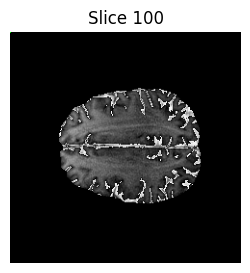

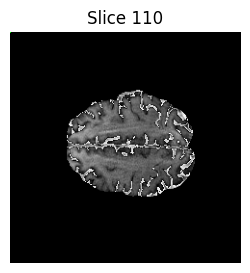

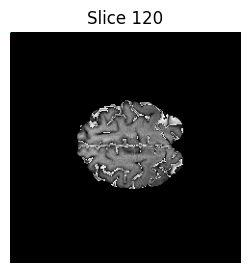

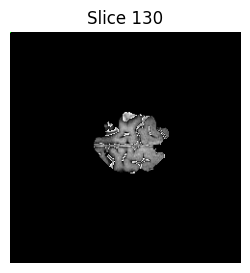

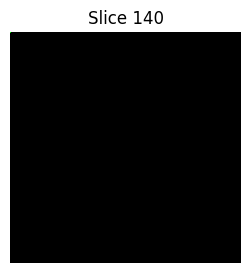

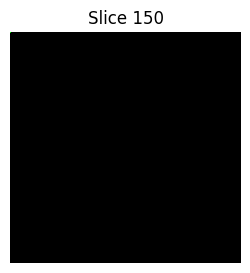

In [4]:
mask = nib.load('/Users/choihanjun/Library/Mobile Documents/com~apple~CloudDocs/Downloads/2024-1/[강화학습]/Project/archive_BraTS2022/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_233/BraTS20_Training_233_t1.nii').get_fdata()

for i in range(0, mask.shape[2], 10):
    msk = mask[:, :, i] / mask.max() * 255
    # msk = cv2.resize(msk, (256, 256))
    _, bw_img = cv2.threshold(msk.astype(np.uint8), 10, 255, cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(bw_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    # rectangles = [cv2.boundingRect(contour) for contour in contours]
    plot_mask_with_rectangles(mask[:, :, i], [[0, 0, 0, 0]], title=f"Slice {i}")

# Masking Visualization

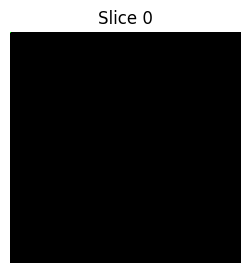

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


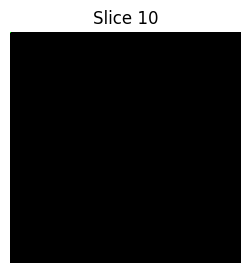

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


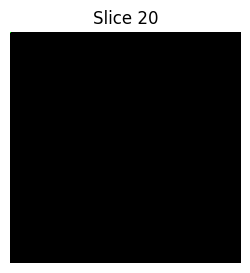

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


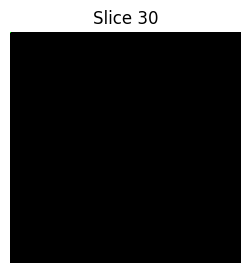

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


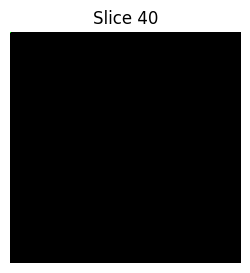

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


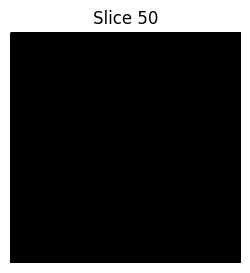

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


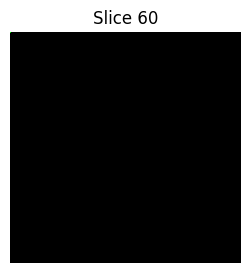

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


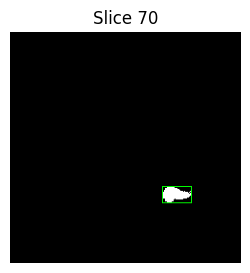

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


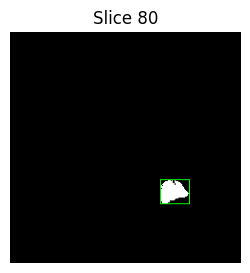

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0. 255.]
 [  0.   0.   0. ...   0. 255. 255.]
 [  0.   0.   0. ... 255.   0. 255.]]


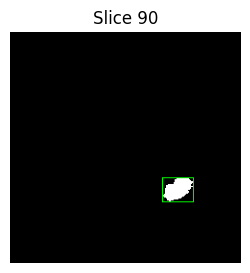

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


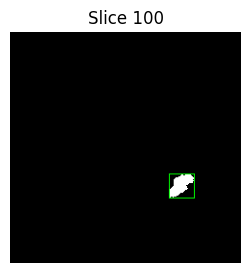

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


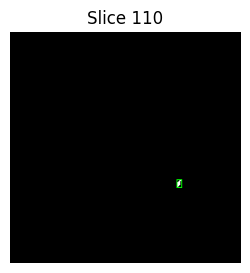

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


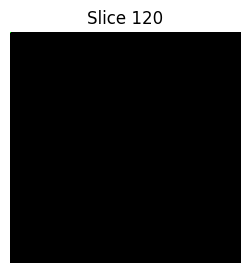

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


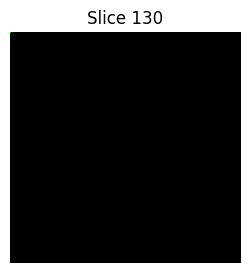

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


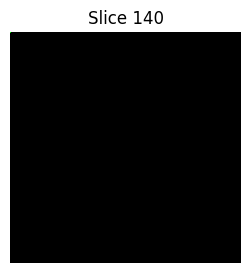

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


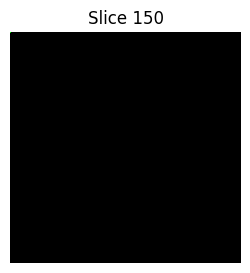

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
mask = nib.load('/Users/choihanjun/Library/Mobile Documents/com~apple~CloudDocs/Downloads/2024-1/[강화학습]/Project/archive_BraTS2022/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_233/BraTS20_Training_233_seg.nii').get_fdata()

for i in range(0, mask.shape[2], 10):
    msk = mask[:, :, i]
    msk[msk!=0] = 255
    _, bw_img = cv2.threshold(msk.astype(np.uint8), 10, 255, cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(bw_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    # rectangles = [cv2.boundingRect(contour) for contour in contours]
    
    # 가장 큰 컨투어 찾기
    max_area = 0
    max_rect = (0, 0, 0, 0)
    for contour in contours:
        rect = cv2.boundingRect(contour)
        area = rect[2] * rect[3]  # rectangle의 넓이 (width * height)
        if area > max_area:
            max_area = area
            max_rect = rect
    
    # 가장 큰 컨투어의 사각형 정보 저장
    rectangles = [max_rect]
    plot_mask_with_rectangles(mask[:, :, i], rectangles, title=f"Slice {i}")
    print(msk[80:160, 80:160])